# Breast Cancer Prediction

In [1]:
Breast cancer is the most common type of cancer in women. When cancers are 
found early, they can often be cured. There are some devices that detect the 
breast cancer but many times they lead to false positives, which results is 
patients undergoing painful, expensive surgeries that were not even necessary.
These type of cancers are called benign which do not require surgeries and we 
can reduce these unnecessary surgeries by using Machine Learning. We take a
dataset of the previous breast cancer patients and train the model to predict
whether the cancer is benign or malignant. These predictions will help doctors 
to do surgeries only when the cancer is malignant, thus reducing the 
unnecessary surgeries for woman.

For building the project we have used Wisconsin Breast cancer data which has
569 rows of which 357 are benign and 212 are malignant. 

SyntaxError: invalid syntax (2473166430.py, line 1)

In [ ]:
# load the dataset
import pandas as pd
df=pd.read_csv("breast_cancer.csv")


In [ ]:
# display first 5 rows
df.head()

In [ ]:
# display last 5 rows
df.tail()

In [ ]:
# dipslay 5 smaples randomly
df.sample(5)

In [ ]:
# Display No of observation and columns
df.shape

In [ ]:
# display the columns
df.columns

In [ ]:
# display No of people  benign or malignant
df['diagnosis'].value_counts()

In [ ]:
# Display in a barchart
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df['diagnosis'])
plt.show()

In [ ]:
# Display the iabove information in percentage
import matplotlib.pyplot as plt
z=plt.pie(df['diagnosis'].value_counts(),\
         labels=['Benign','Malignant'],autopct='%0.2f%%',shadow=True,textprops={'fontsize':20})

# REMOVE  'id'  and 'Unnamed: 32'  column

In [ ]:
df1=df.drop(columns=['Unnamed: 32','id']) #Dropping irrelevant columns

In [ ]:
df1.head(2)

In [ ]:
df1.shape

#  Find Missing values in each column

In [ ]:
df1.isnull().sum()

# Dropping Rows having 0 in Dataset

In [ ]:
import numpy as np
df1=df1.replace(0,np.nan)
df2=df1.dropna()
df2.shape

In [ ]:
#Droppping Duplicate Values
df3=df2.drop_duplicates()
df3.shape

In [ ]:
## Now  display No of people  benign or malignant
df3['diagnosis'].value_counts()

In [ ]:
# Now convert the diagnosis column to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df3['diagnosis']=le.fit_transform(df3['diagnosis'])


In [ ]:
df3.sample(5)  #  B---0    M---1

# Find Corerelation between features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df3.corr(),annot=True)
plt.show()

# Dropping columns having co-relation of 88 and higher

In [ ]:

import numpy as np
corr_matrix = df3.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df3 = corr_matrix.mask(mask)

to_drop = [x for x in tri_df3.columns if any(tri_df3[x] > 0.88)]

df3 = df3.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df3.shape[1]} columns.")

In [ ]:
df3.shape

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df3.corr(),annot=True)
plt.show()

In [ ]:
# Separate input and output

In [ ]:

X=df3.drop(columns=['diagnosis'])
Y=df3['diagnosis']

In [ ]:
Y

In [ ]:
#Splitting for train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=40)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

# Scale down the features  by using Normalization


In [ ]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_train=ms.fit_transform(X_train)
X_test=ms.transform(X_test)

# k Nearest Neighbors MODEL

In [2]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(n_neighbors=5)
#train the model
k.fit(X_train,Y_train)
#test the model
Y_pred_knn=k.predict(X_test)
#find accuracy
from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(Y_test,Y_pred_knn)
acc_knn=round(acc_knn*100,2)
print("Accuracy using KNN is",acc_knn,"%")
#classification Report
from sklearn.metrics import classification_report
predictions = k.predict(X_test)
print(classification_report(Y_test, predictions))

NameError: name 'X_train' is not defined

# Confusion Matrix of KNN model

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred_knn)
print(cm)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.show()

# Logistic Regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
L=LogisticRegression()
#Train the Model
L.fit(X_train,Y_train)
#Test th model
Y_pred_lg=L.predict(X_test)
from sklearn.metrics import accuracy_score
acc_lg=accuracy_score(Y_test,Y_pred_lg)
acc_lg=round(acc_lg*100,2)
print("Accuracy using LogisticRegression is",acc_lg,"%")
#classification Report
from sklearn.metrics import classification_report
predictions = L.predict(X_test)
print(classification_report(Y_test, predictions))

# Confusion Matrix of LG Model

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred_lg)
print(cm)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.show()

# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=40)
#Train the model
rf.fit(X_train,Y_train)
#Test Model
Y_pred_rf=rf.predict(X_test)
#find accuracy
from sklearn.metrics import accuracy_score
acc_rf=accuracy_score(Y_test,Y_pred_rf)
acc_rf=round(acc_rf*100,2)
print("Accuracy using RandomForest is",acc_rf,"%")
#classification Report
from sklearn.metrics import classification_report
predictions = rf.predict(X_test)
print(classification_report(Y_test, predictions))

# Confusion Matrix of RF model

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred_rf)
print(cm)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.show()

# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier(criterion='entropy')
#train the model
D.fit(X_train,Y_train)
#test model
Y_pred_dt=D.predict(X_test)
#Find Accuracy
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(Y_test,Y_pred_dt)
acc_dt=round(acc_dt*100,2)
print("Accuracy using DecisionTree is",acc_dt,"%")
#classification Report
from sklearn.metrics import classification_report
predictions = D.predict(X_test)
print(classification_report(Y_test, predictions))


# Confusion Matrix of DT Model

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,Y_pred_dt)
print(cm)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.show()

# Naive-Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
n=GaussianNB()
#train the model
n.fit(X_train,Y_train)
#test the model
Y_pred_nb=n.predict(X_test)
#Find Accuracy
from sklearn.metrics import accuracy_score
acc_nb=accuracy_score(Y_test,Y_pred_nb)
acc_nb=round(acc_nb*100,2)
print("Accuracy using Naive Bayes is",acc_nb,"%")
#classification Report
from sklearn.metrics import classification_report
predictions = n.predict(X_test)
print(classification_report(Y_test, predictions))

# Confusion Matrix of NB Model

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred_nb)
print(cm)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.show()

# Support Vector Machine Model

In [ ]:
from sklearn.svm import SVC
s=SVC(C=1,kernel='linear') #support vector classifier # for reg use SVR()
#train the model
s.fit(X_train,Y_train)
#test the model
Y_pred_svm=s.predict(X_test)
#Find Accuracy
from sklearn.metrics import accuracy_score
acc_svm=accuracy_score(Y_test,Y_pred_svm)
acc_svm=round(acc_svm*100,2)
print("Accuracy using Support Vector Machine is",acc_svm,"%")
#classification Report
from sklearn.metrics import classification_report
predictions = s.predict(X_test)
print(classification_report(Y_test, predictions))


# Confusion Matrix of SVM Model

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred_svm)
print(cm)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.show()

# Display accuacy of all models 

In [ ]:
print("Accuracy using KNN is",acc_knn,"%")
print("Accuracy using LogisticRegression is",acc_lg,"%")
print("Accuracy using RandomForest is",acc_rf,"%")
print("Accuracy using DecisionTree is",acc_dt,"%")
print("Accuracy using Naive Bayes is",acc_nb,"%")
print("Accuracy using Support Vector Machine is",acc_svm,"%")

In [ ]:
# The best model is random forest  with accuracy  approx 98%

# Accuracy Comparision using Bar chart

In [ ]:
import matplotlib.pyplot as plt
plt.bar(['Log ','KNN','SVM','DT','RF','NB'],[acc_lg,acc_knn,acc_svm,acc_dt,acc_rf,acc_nb] ,color=['g','y','b','r','violet','black'])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

# GUI

In [ ]:
# load the dataset
import pandas as pd
df=pd.read_csv("breast_cancer.csv")
df1=df.drop(columns=['Unnamed: 32','id']) #Dropping irrelevant columns
import numpy as np
df1=df1.replace(0,np.nan)
df2=df1.dropna()
#Droppping Duplicate Values
df3=df2.drop_duplicates()
# Now convert the diagnosis column to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df3['diagnosis']=le.fit_transform(df3['diagnosis'])
#######  reduce columns accordig to corelation
import numpy as np
corr_matrix = df3.corr().abs() 
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df3 = corr_matrix.mask(mask)
to_drop = [x for x in tri_df3.columns if any(tri_df3[x] > 0.88)]
df3 = df3.drop(to_drop, axis = 1)
X=df3.drop(columns=['diagnosis'])
Y=df3['diagnosis']
#Splitting for train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=40)
#Scaling  by Narmalization
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_train=ms.fit_transform(X_train)
X_test=ms.transform(X_test)
from sklearn.metrics import classification_report
#########################################################################
## KNN  Model
def KNN():
    
    from sklearn.metrics import classification_report
    global acc_knn
    global k
    from sklearn.neighbors import KNeighborsClassifier
    k=KNeighborsClassifier(n_neighbors=5)
    #train the model
    k.fit(X_train,Y_train)
    #test the model
    Y_pred_knn=k.predict(X_test)
    #find accuracy
    from sklearn.metrics import accuracy_score
    acc_knn=accuracy_score(Y_test,Y_pred_knn)
    acc_knn=round(acc_knn*100,2)
    m.showinfo(title='KNN',message='Accuracy using KNN is '+str(acc_knn)+'%')
    m.showinfo(title='KNN',message='Classification report of \
    KNN is \n'+str(classification_report(Y_test, Y_pred_knn)))

#######################################################################
def LG():
    
    # Logistic  Regression
    global L
    global acc_lg
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.linear_model import LogisticRegression
    L=LogisticRegression()
    #Train the Model
    L.fit(X_train,Y_train)
    #Test th model
    Y_pred_lg=L.predict(X_test)
    from sklearn.metrics import accuracy_score
    acc_lg=accuracy_score(Y_test,Y_pred_lg)
    acc_lg=round(acc_lg*100,2)
    m.showinfo(title='LG',message='Accuracy using LG is '+str(acc_lg)+'%')
   
    m.showinfo(title='LG',message='Classification report of \
    LG is \n'+str(classification_report(Y_test, Y_pred_lg)))
#######################################################################
# Naive bayes  Model
#-------------------------------------------------------------------------
def NB():
    
    global acc_nb
    global n
    from sklearn.naive_bayes import GaussianNB
    n=GaussianNB()
    #train the model
    n.fit(X_train,Y_train)
    #test the model
    Y_pred_nb=n.predict(X_test)
    #Find Accuracy
    from sklearn.metrics import accuracy_score
    acc_nb=accuracy_score(Y_test,Y_pred_nb)
    acc_nb=round(acc_nb*100,2)
    m.showinfo(title='NB',message='Accuracy using NB is '+str(acc_nb)+'%')
    m.showinfo(title='NB',message='Classification report of\
    NB is \n'+str(classification_report(Y_test, Y_pred_nb)))
######################################################################
#########------------------Random Forest _______________
def RF():
    global acc_rf
    global rf
    from sklearn.ensemble import RandomForestClassifier
    rf=RandomForestClassifier(n_estimators=10,criterion='entropy',\
                              random_state=40)
    #Train the model
    rf.fit(X_train,Y_train)
    #Test Model
    Y_pred_rf=rf.predict(X_test)
    #find accuracy
    from sklearn.metrics import accuracy_score
    acc_rf=accuracy_score(Y_test,Y_pred_rf)
    acc_rf=round(acc_rf*100,2)
    m.showinfo(title='RF',message='Accuracy using RF is '+str(acc_rf)+'%')
    m.showinfo(title='RF',message='Classification report of\
    RF is \n'+str(classification_report(Y_test, Y_pred_rf)))
############################################################
##-----------------support vector  machine
def SVM():
    
    global acc_svm
    global s
    from sklearn.svm import SVC
    s=SVC(C=1,kernel='linear') #support vector classifier # for reg use SVR()
    #train the model
    s.fit(X_train,Y_train)
    #test the model
    Y_pred_svm=s.predict(X_test)
    #Find Accuracy
    from sklearn.metrics import accuracy_score
    acc_svm=accuracy_score(Y_test,Y_pred_svm)
    acc_svm=round(acc_svm*100,2)
    m.showinfo(title='SVM',message='Accuracy using SVM is '+str(acc_svm)+'%')
    m.showinfo(title='SVM',message='Classification report of \
    SVM is \n'+str(classification_report(Y_test, Y_pred_svm)))
#######################################################
##---------------Decision Tree model
def DT():
    
    global D
    global acc_dt
    from sklearn.tree import DecisionTreeClassifier
    D=DecisionTreeClassifier(criterion='entropy')
    #train the model
    D.fit(X_train,Y_train)
    #test model
    Y_pred_dt=D.predict(X_test)
    #Find Accuracy
    from sklearn.metrics import accuracy_score
    acc_dt=accuracy_score(Y_test,Y_pred_dt)
    acc_dt=round(acc_dt*100,2)
    m.showinfo(title='DT',message='Accuracy using DT is '+str(acc_dt)+'%')
    m.showinfo(title='DT',message='Classification report of\
    DT is \n'+str(classification_report(Y_test, Y_pred_dt)))
###############################################################
##############################################################

def compare():
    '''import matplotlib.pyplot as plt
    plt.bar(['Log ','KNN','SVM','DT','RF','NB'],[acc_lg,acc_knn,acc_svm,acc_dt,acc_rf,acc_nb] ,color=['g','y','b','r','violet','black'])
    plt.xlabel("Algorithms")
    plt.ylabel("Accuracy")
    plt.show()'''
    
    z=list(zip([acc_lg,acc_knn,acc_svm,acc_dt,acc_rf,acc_nb],\
               ['Log ','KNN','SVM','DT','RF','NB']))
    model=max(z)[1]
        
    m.showinfo(title='Best model',message="best model is"+model)


    
    


    

   

    
def submit():
    smt_mean=float(vsmt_mean.get())
    sym_mean=float(vsym_mean.get())
    fd_mean=float(vfd_mean.get())
    text_se=float(vtext_se.get())
    area_se=float(varea_se.get())
    smt_se=float(vsmt_se.get())
    com_se=float(vcom_se.get())
    con_se=float(vcon_se.get())
    cnp_se=float(vcnp_se.get())
    sym_se=float(vsym_se.get())
    fd_se=float(vfd_se.get())
    text_worst=float(vtext_worst.get())
    area_worst=float(varea_worst.get())
    smt_worst=float(vsmt_worst.get())
    con_worst=float(vcon_worst.get())
    cnp_worst=float(vcnp_worst.get())
    sym_worst=float(vsym_worst.get())
    fd_worst=float(vfd_worst.get())
    
    
    
    result=rf.predict(ms.transform([[smt_mean,sym_mean,fd_mean,text_se,area_se,smt_se,com_se,con_se,cnp_se,sym_se,fd_se,\
                       text_worst,area_worst,smt_worst,con_worst,cnp_worst,sym_worst,fd_worst]]))
    
   
   
    if result[0]==0:
        cancer='BENIGN'
    else:
        cancer='MALIGNANT'
    
    
    
   
    m.showinfo(title="Analysis Result",message=cancer)
     

def reset():
    vsmt_mean.set("")
    vsym_mean.set("")
    vfd_mean.set("")
    vtext_se.set("")
    varea_se.set("")
    vsmt_se.set("")
    vcom_se.set("")
    vcon_se.set("")
    vcnp_se.set("")
    vsym_se.set("")
    vfd_se.set("")
    vtext_worst.set("")
    varea_worst.set("")
    vsmt_worst.set("")
    vcon_worst.set("")
    vcnp_worst.set("")
    vsym_worst.set("")
    vfd_worst.set("")
        
    

from tkinter import * 
import tkinter.messagebox as m
w=Tk()
vsmt_mean=StringVar()
vsym_mean=StringVar()
vfd_mean=StringVar()
vtext_se=StringVar()
varea_se=StringVar()
vsmt_se=StringVar()
vcom_se=StringVar()
vcon_se=StringVar()
vcnp_se=StringVar()
vsym_se=StringVar()
vfd_se=StringVar()
vtext_worst=StringVar()
varea_worst=StringVar()
vsmt_worst=StringVar()
vcon_worst=StringVar()
vcnp_worst=StringVar()
vsym_worst=StringVar()
vfd_worst=StringVar()


L1=Label(w,text="BREAST CANCER PREDICTION",font=('arial',18,'bold'),bg='yellow')
L1.grid(row=1,column=1,columnspan=6)
#row two
Bknn=Button(w,text="KNN",font=('arial',15,'bold'),command=KNN)
Blg=Button(w,text="LG",font=('arial',15,'bold'),command=LG)
Bnb=Button(w,text="NB",font=('arial',15,'bold'),command=NB)
Bsvm=Button(w,text="SVM",font=('arial',15,'bold'),command=SVM)
Bdt=Button(w,text="DT",font=('arial',15,'bold'),command=DT)
Brf=Button(w,text="RF",font=('arial',15,'bold'),command=RF)
Bknn.grid(row=2,column=1)
Bsvm.grid(row=2,column=2)
Brf.grid(row=2,column=3)
Bdt.grid(row=2,column=4)
Blg.grid(row=2,column=5)
Bnb.grid(row=2,column=6)            
#3rd row
L2=Label(w,text="Predict Tumour Type",font=('arial',18,'bold'),bg='orange',relief='solid',width=30)
L2.grid(row=3,column=1,columnspan=6)
#4th row
Lsm_m=Label(w,text="Smoothness_mean",font=('arial',15,'bold'))
Esm_m=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vsmt_mean)
Lsy_m=Label(w,text="Symmetry_mean",font=('arial',15,'bold'))
Esy_m=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vsym_mean)
Lsm_m.grid(row=4,column=1,columnspan=2)
Esm_m.grid(row=4,column=3)
Lsy_m.grid(row=4,column=4,columnspan=2)
Esy_m.grid(row=4,column=6)
#5th Row
Lfd_m=Label(w,text="fractal_dimension_mean",font=('arial',15,'bold'))
Efd_m=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vfd_mean)
Lt_s=Label(w,text="texture_se",font=('arial',15,'bold'))
Et_s=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vtext_se)
Lfd_m.grid(row=5,column=1,columnspan=2)
Efd_m.grid(row=5,column=3)
Lt_s.grid(row=5,column=4,columnspan=2)
Et_s.grid(row=5,column=6)
#6th row
Lar_s=Label(w,text="area_se",font=('arial',15,'bold'))
Ear_s=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=varea_se)
Lsm_s=Label(w,text="smoothness_se",font=('arial',15,'bold'))
Esm_s=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vsmt_se)
Lar_s.grid(row=6,column=1,columnspan=2)
Ear_s.grid(row=6,column=3)
Lsm_s.grid(row=6,column=4,columnspan=2)
Esm_s.grid(row=6,column=6)
#7th Row
Lcm_s=Label(w,text="compactness_se",font=('arial',15,'bold'))
Ecm_s=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vcom_se)
Lcn_s=Label(w,text="concavity_se",font=('arial',15,'bold'))
Ecn_s=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vcon_se)
Lcm_s.grid(row=7,column=1,columnspan=2)
Ecm_s.grid(row=7,column=3)
Lcn_s.grid(row=7,column=4,columnspan=2)
Ecn_s.grid(row=7,column=6)
#8th Row
Lcp_s=Label(w,text="concave points_se",font=('arial',15,'bold'))
Ecp_s=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vcnp_se)
Lsy_s=Label(w,text="symmetry_se",font=('arial',15,'bold'))
Esy_s=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vsym_se)
Lcp_s.grid(row=8,column=1,columnspan=2)
Ecp_s.grid(row=8,column=3)
Lsy_s.grid(row=8,column=4,columnspan=2)
Esy_s.grid(row=8,column=6)
#9th Row
Lfd_s=Label(w,text="fractal_dimension_se",font=('arial',15,'bold'))
Efd_s=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vfd_se)
Lt_w=Label(w,text="texture_worst",font=('arial',15,'bold'))
Et_w=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vtext_worst)
Lfd_s.grid(row=9,column=1,columnspan=2)
Efd_s.grid(row=9,column=3)
Lt_w.grid(row=9,column=4,columnspan=2)
Et_w.grid(row=9,column=6)
#10th Row
La_w=Label(w,text="area_worst",font=('arial',15,'bold'))
Ea_w=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=varea_worst)
Lsm_w=Label(w,text="smoothness_worst",font=('arial',15,'bold'))
Esm_w=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vsmt_worst)
La_w.grid(row=10,column=1,columnspan=2)
Ea_w.grid(row=10,column=3)
Lsm_w.grid(row=10,column=4,columnspan=2)
Esm_w.grid(row=10,column=6)
#11th ROW
Lcn_w=Label(w,text="concavity_worst",font=('arial',15,'bold'))
Ecn_w=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vcon_worst)
Lcp_w=Label(w,text="concave points_worst",font=('arial',15,'bold'))
Ecp_w=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vcnp_worst)
Lcn_w.grid(row=11,column=1,columnspan=2)
Ecn_w.grid(row=11,column=3)
Lcp_w.grid(row=11,column=4,columnspan=2)
Ecp_w.grid(row=11,column=6)
#12 th Row
Lsy_w=Label(w,text="symmetry_worst",font=('arial',15,'bold'))
Esy_w=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vsym_worst)
Lfd_w=Label(w,text="fractional_dimension_worst",font=('arial',15,'bold'))
Efd_w=Entry(w,font=('arial',15,'bold'),bg='light green',width=10,textvariable=vfd_worst)
Lsy_w.grid(row=12,column=1,columnspan=2)
Esy_w.grid(row=12,column=3)
Lfd_w.grid(row=12,column=4,columnspan=2)
Efd_w.grid(row=12,column=6)

#13th Row
Bcmp=Button(w,text="Compare",font=('arial',16,'bold'),command=compare)
Bsub=Button(w,text="Submit",font=('arial',16,'bold'),command=submit)

Bres=Button(w,text="Reset",font=('arial',16,'bold'),command=reset)
Bcmp.grid(row=13,column=1,columnspan=2)
Bsub.grid(row=13,column=3,columnspan=2)
Bres.grid(row=13,column=5,columnspan=2)
w.mainloop()

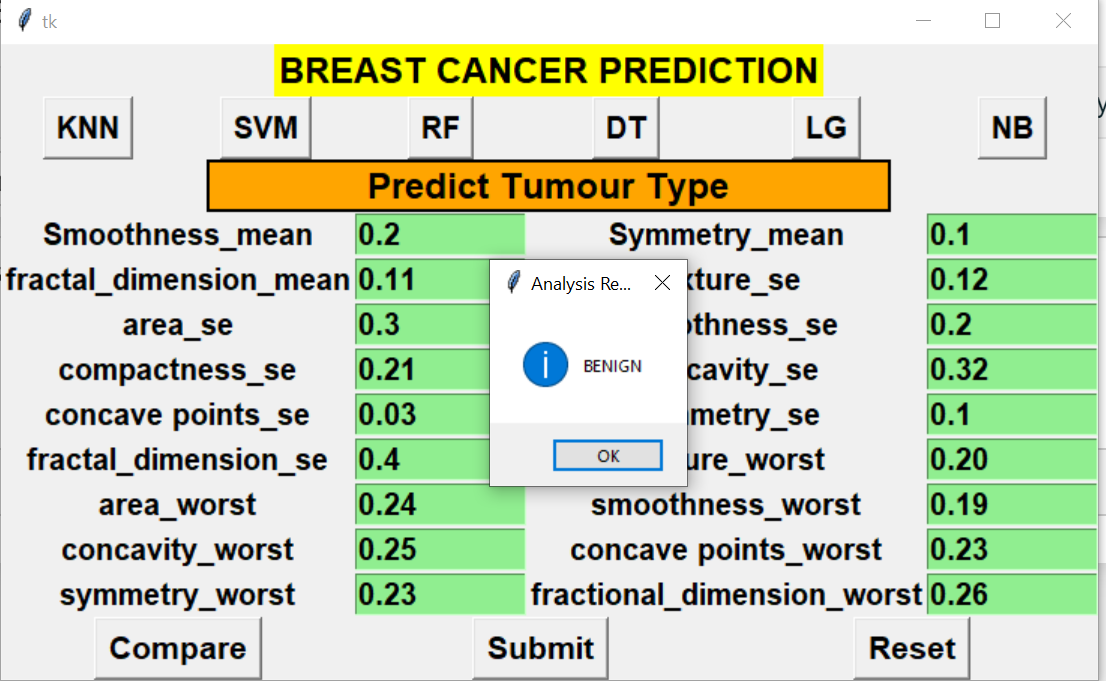

In [ ]:
X_train[0]